# Project 3: Reinforcement Learning and Inverse Reinforcement Learning

In [25]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import solvers, matrix

## Reinforcement Learning (RL)

Question 1: (10 points) For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question

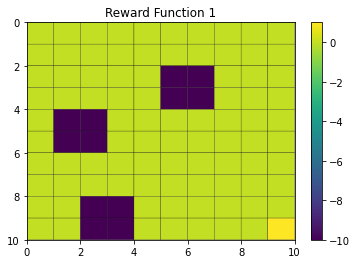

In [3]:
# Reward function 1
reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,1]])

# Visualizing the reward
plt.pcolor(reward_fnx1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.show()

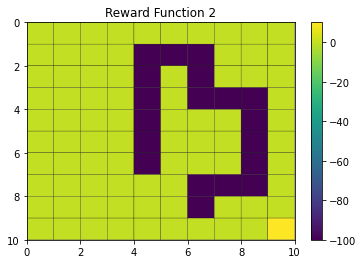

In [4]:
# Reward function 2
reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

# Visualizing the reward
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.show()

Question 2: (40 points) Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

    • Number of states = 100 
    • Number of actions = 4
    • w = 0.1
    • Discount factor = 0.8
    • Reward function 1

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this part of question, you should have 1 plot.

In [5]:
# Setting up the environment of the MDP

# Initialize the state space
k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
# probability transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right

In [6]:
# Value iteration algorithm

def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state


def value_iteration_with_intervals(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon,optimal_steps=32):
    current_state=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (reward_fnx.T).ravel()
    intervals = np.round(np.linspace(1,optimal_steps-1,5))
    steps = 0
    while(delta>epsilon):
        if steps in intervals:
            current_state_ = np.copy(current_state)
            current_state_ = np.transpose(current_state_.reshape(10,10))
            snapshot.append(current_state_) 
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    return snapshot

In [7]:
# Computing the optimal state-value using the value iteration algorithm

# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 22


Text(0.5, 1.0, 'Optimal state values for Reward function 1 (After Iterations = 22)')

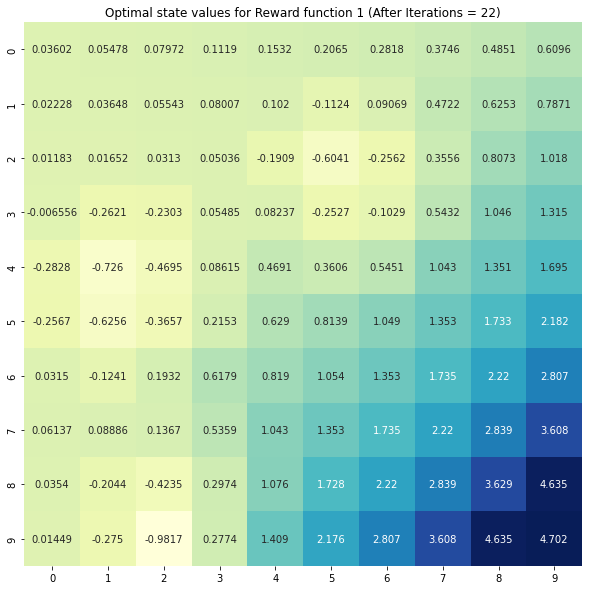

In [8]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1 (After Iterations = 22)")

Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?

5


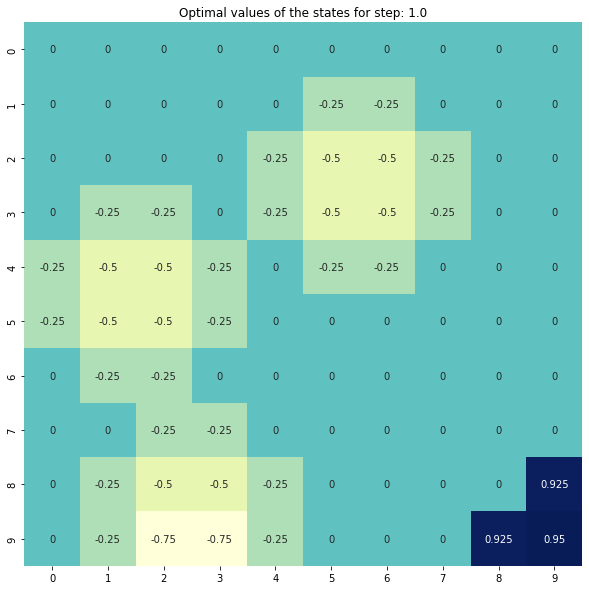

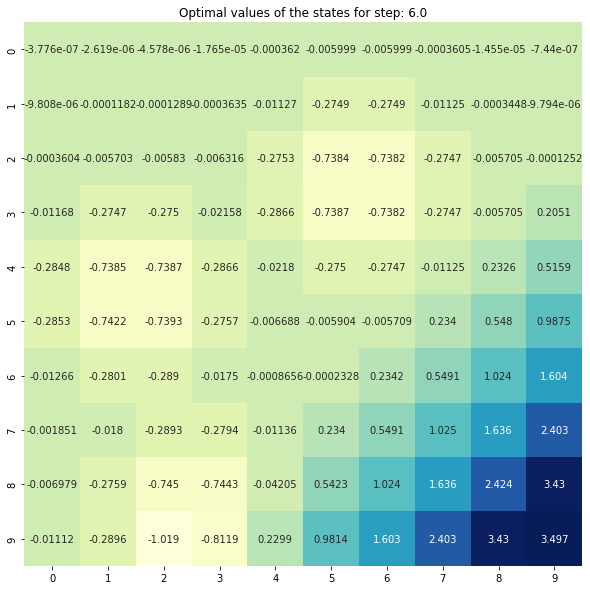

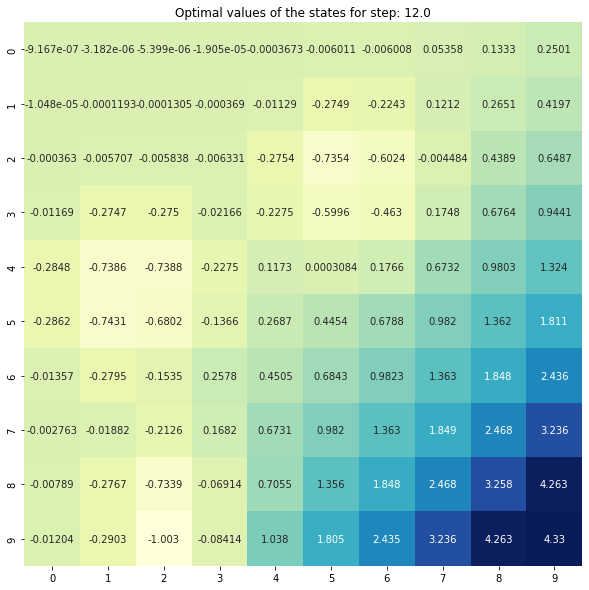

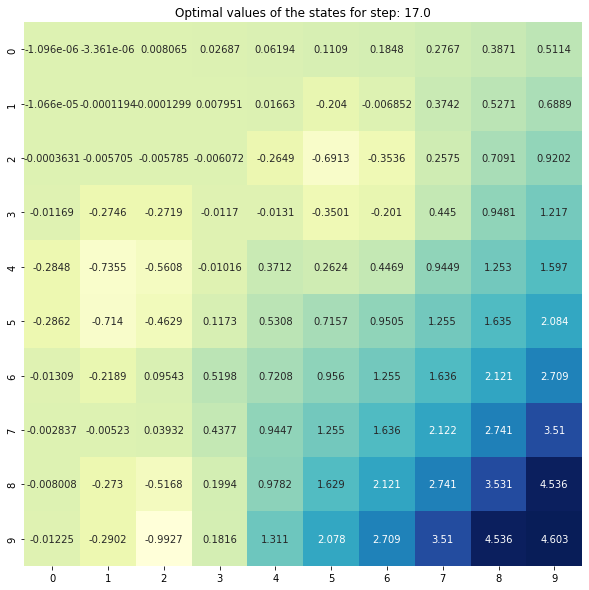

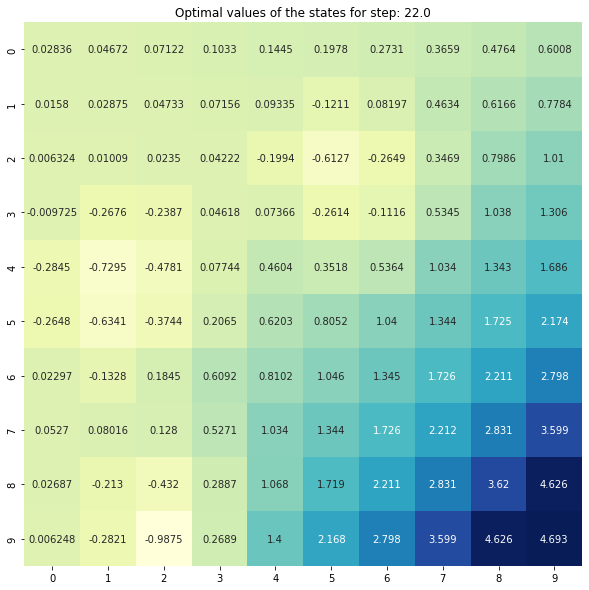

In [9]:
# Snapshots of the state-value until convergence
snapshots = value_iteration_with_intervals(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=22)
print(len(snapshots))

intervals = np.round(np.linspace(1, 22, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

From the plots, we can see how the grid starts to shift to higher optimal state values to favor the corner of the reward function where the reward is the highest. Those values of the reward function where the reward is the lowest have lower optimal state values than the rest of the grid. We can see this progression over the different steps.

Question 3: (5 points) Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

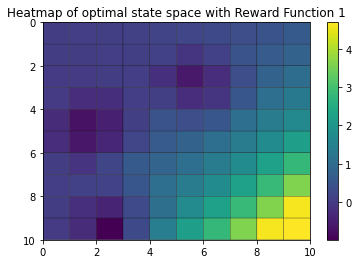

In [10]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 1")
plt.show()

Question 4: (15 points) Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

From the heatmap, we can see that the highest values in the optimal state space are where the reward function has the highest reward, that being the bottom right corner. The lowest values in the optimal state space are where the reward function has the lowest reward, that being the three 2x2 squares. As the location in the grid approaches the bottom right corner where the reward is the highest, we can see the optimal state values start to increase gradually.

Question 5: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it’s neighboring states? In this question, you should have 1 plot.

In [11]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

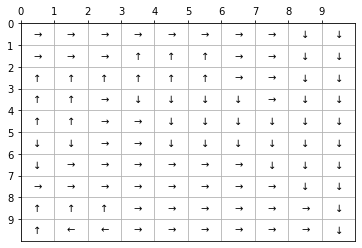

In [12]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

The optimal policy of the agent does indeed match my intuition. We can see that the arrows lead to the reward of high value and away from the reward of low value. It may be possible for the agent to compute the optimal action by observing the optimal values of its neighboring states, although it must take caution to weigh its neighbors appropriately so as to not choose a poor action.

Question 6: (10 points) Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [13]:
# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 32


Text(0.5, 1.0, 'Optimal state values for Reward function 2 (After Iterations = 32)')

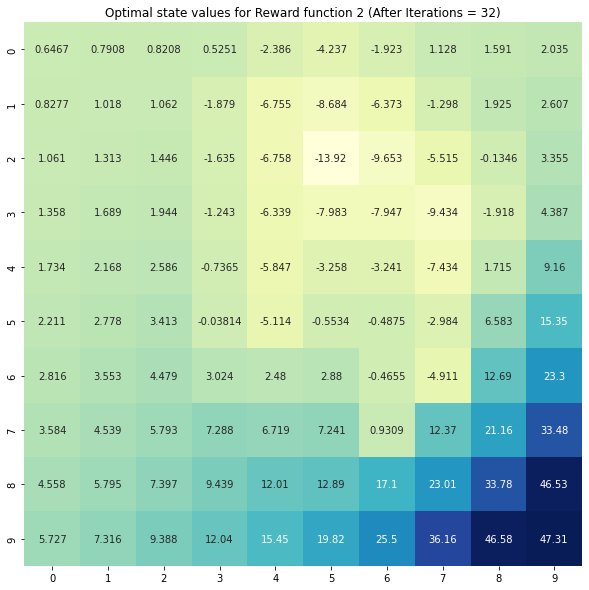

In [14]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 2 (After Iterations = 32)")

Question 7: (20 points) Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier. Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in this question to explain)

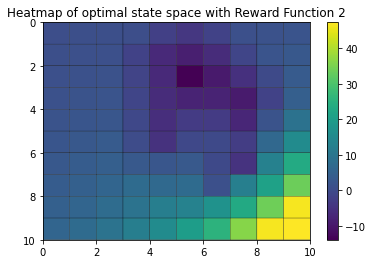

In [15]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

From the heatmap, we can see that the highest values in the optimal state space are where the reward function has the highest reward, that being the bottom right corner. The lowest values in the optimal state space are where the reward function has the lowest reward, that being the short path. As the location in the grid approaches the bottom right corner where the reward is the highest, we can see the optimal state values start to increase gradually.

Question 8: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

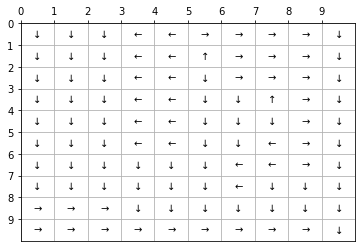

In [16]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

The optimal policy of the agent does indeed match my intuition. We can see that the arrows lead to the reward of high value and away from the reward of low value. 

Question 9:(20 points) Change the hyper parameter w to 0.6 and find the optimal policy map similar to previous question for reward functions. Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the w that you think give rise to better optimal policy and use that w for the next stages of the project.

Number of steps needed to converge: 19


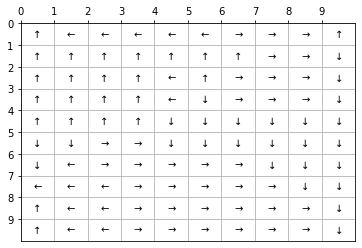

In [23]:
# w = 0.6 with Reward function 1

# Parameters
w = 0.6
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Number of steps needed to converge: 27


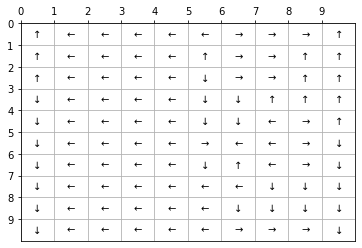

In [21]:
# w = 0.6 with Reward function 2

# Parameters
w = 0.6
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Using w = 0.6 with both reward functions, we can see that the arrows do not reflect the best path to lead to the bottom left corner where the reward is the highest. Especially along the edges or in areas where there is no direct conflict due to a low reward, the optimal actions seem to be pointing away from our so-called "end goal". This is not optimal at all, and for this reason, we will proceed with using w = 0.1 moving forward as we did previously.

## Inverse Reinforcement Learning (IRL)

Question 10: (10 points) Express $c$, $x$, $D$, $b$ in terms of $R$, $P_a$, $P_{a1}$ , $t_i$, $u$, $λ$ and $R_{max}$

Question 11: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [26]:
# Computing the optimal policy and not plot it
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): 
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows

# Prepare the matrices for the LP solver
def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

# Computing the accuracy
def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc

In [27]:
# Computing the optimal expert policy using the reward functions 1 and 2

w = 0.1
gamma = 0.8
epsilon = 0.01

k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right]

policy1, arrows1 = find_policy_irl(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_irl(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [28]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

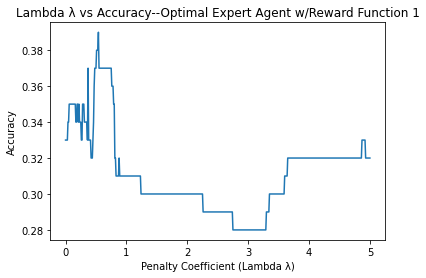

In [30]:
plt.plot(lambdas_list, all_accuracies[0])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

Question 12: (5 points) Use the plot in question 11 to compute the value of $λ$ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}$. Please report $λ_{max}$

In [33]:
acc_max1 = np.argmax(all_accuracies[0])
lambda_max1 = lambdas_list[acc_max1]
print('Max 1 Accuracy:', all_accuracies[0][acc_max1])
print('Max Lambda 1 Value:', lambda_max1)

Max 1 Accuracy: 0.39
Max Lambda 1 Value: 0.54


Question 13: (15 points) For $λ_{max}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the $λ$ parameter set to $λ_{max}$. In this question, you should have 2 plots.

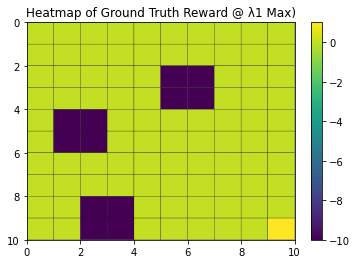

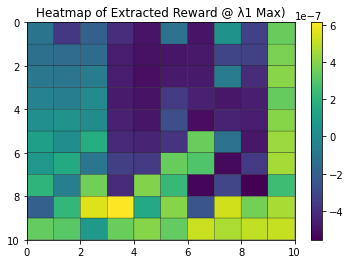

In [34]:
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max1, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx1, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ1 Max)")
plt.show()

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ1 Max)")
plt.show()

Question 18: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 8 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

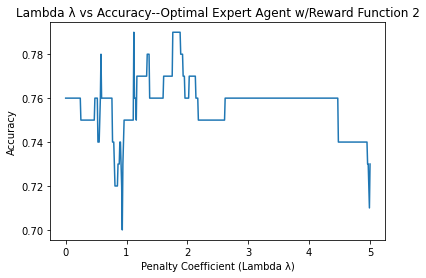

In [31]:
plt.plot(lambdas_list, all_accuracies[1])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

Question 19: (5 points) Use the plot in question 18 to compute the value of $λ$ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}$. Please report $λ_{max}$

In [35]:
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.79
Max Lambda 2 Value: 1.12


Question 20: (15 points) For λmax, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is computed by solving the linear program given by equation 2 with the λ parameter set to λmax. In this question, you should have 2 plots.

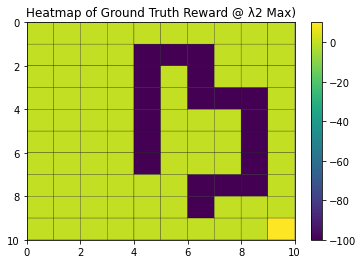

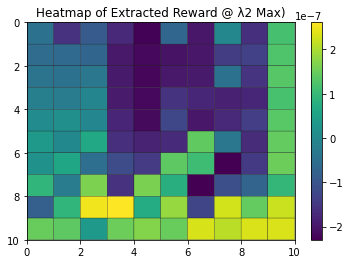

In [36]:
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()